## Predicting future global temperature and greenhouse gas emissions

### Capstone Project Three : Springboard Data Science career track

### 1.Introduction

Global warming, marked by a sustained increase in average temperatures, leads to lasting changes in weather patterns and ecosystems. This project aims to predict the future interplay between greenhouse gas (GHG) emissions and global temperature changes. CO2, CH4, and N2O, identified by the European Commission as the most impactful gases on global warming (European Commission, 2018), are the focus of this study. By examining the relationships between these emissions and temperature fluctuations, the study seeks to provide predictive insights for formulating effective environmental policies.
Climate change, defined by long-term shifts in weather patterns, is significantly affecting life on Earth. Substantial evidence, such as the rise in ocean temperatures and the increased frequency of extreme weather events, underscores the reality of climate change. Addressing global warming is a critical challenge that demands accurate predictions of GHG emissions and temperature impacts, essential for developing strategies to mitigate its effects on a global scale.


### 2.Research questions

**1-Quantify the Relationship:** Analyze the correlation between CO2, N2O, and CH4 emissions with global temperature variations to understand the relative impact of each GHG on climate change.

**2-Trend Analysis:** Identify and model trends in both GHG emissions and global temperature changes over the decades to forecast future climate conditions.

**3-Predictive Modeling:** Develop predictive models to forecast future global temperature changes based on current and hypothetical future GHG emission trends.


### 3.Import the necessary libraries and the data

### 3.1.Import libraries

### 3.2.Load teh data

In [1]:
!pip install pmdarima


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
import itertools
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm

In [18]:
# Loading data

df= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/df")

In [3]:
df

Year  Month  Anomaly  Uncertainty     CO2      CH4    N2O  \
0    1984      1    0.291        0.055  344.32  1638.79  303.8   
1    1984      2    0.145        0.054  344.82  1638.84  303.8   
2    1984      3    0.292        0.042  344.96  1640.88  303.7   
3    1984      4    0.178        0.070  345.19  1643.99  303.7   
4    1984      5    0.388        0.043  345.33  1643.12  303.7   
..    ...    ...      ...          ...     ...      ...    ...   
931  2022      8    0.830        0.034  414.41  1908.82  335.8   
932  2022      9    0.756        0.034  414.63  1915.52  335.9   
933  2022     10    0.871        0.034  416.14  1919.85  336.1   
934  2022     11    0.654        0.048  417.77  1923.43  336.3   
935  2022     12    0.775        0.050  418.80  1924.69  336.5   

     Actual_Temperature  
0                12.521  
1                12.585  
2                13.352  
3                14.148  
4                15.338  
..                  ...  
931              16.610  
932              15.946  
933              15.121  
934              13.884  
935              13.265  

[936 rows x 8 columns]

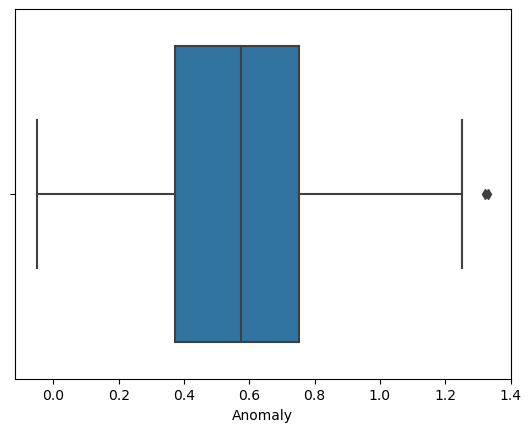

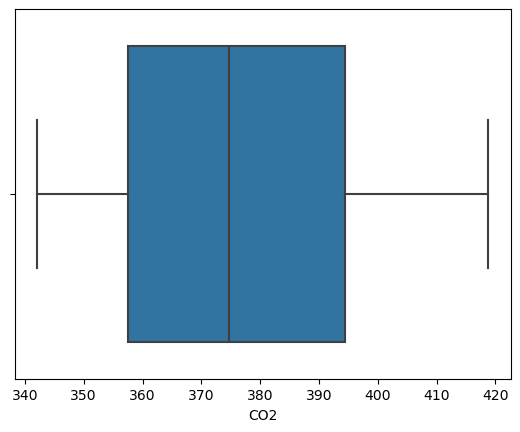

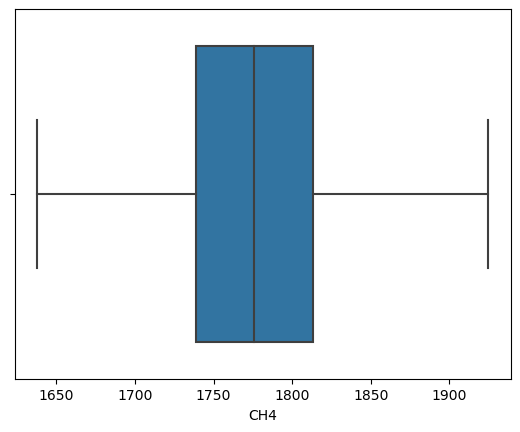

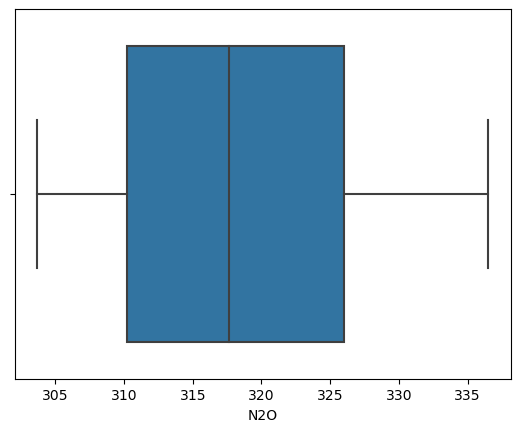

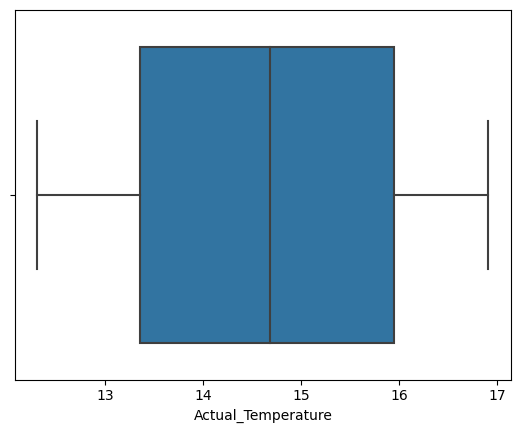

In [4]:
# Check for outliers

columns_to_plot = ['Anomaly', 'CO2', 'CH4', 'N2O', 'Actual_Temperature']

for column in columns_to_plot:
    sns.boxplot(x=df[column])
    plt.show()



### 4.Split into testing and training datasets

In [5]:
#Separate the features and the target variable

X= df.drop(columns=['Anomaly','Uncertainty'])
y= df['Anomaly']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Print the shape of the resulting datasets
print(f'X_train shape :{X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape :{y_train.shape}')
print(f'y_test shape :{y_test.shape}')

X_train shape :(748, 6)
X_test shape : (188, 6)
y_train shape :(748,)
y_test shape :(188,)



### 5.Feature Scaling

Given that the features (CO2, CH4, N2O, and Temperature) have different units and ranges, I should standardize or normalize the data.Given that the features (especially CO2 and CH4) are not perfectly normally distributed and have skewness, **standardization** would generally be the better option. It would handle the variance and spread of the data more effectively, particularly for models like linear regression or algorithms that assume data is centered around 0.

In [6]:
# Instantiate the scaler

scaler= StandardScaler()

# Apply the scaler to the training data

X_train_scaled= scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


### 6.Feature Selection

Based on the results from previouse step(EDA)and correlation matrix the following features will be considered:

* CO2
* N2O
* CH4
* Actual_Temperature
* Year
* Month

### 7. Model Selection

This is a regression problem, in supervised learning and due to multicollinearity between features I choose following models that roboust to multicollinearity.

**1- Random Forest**

**2- XGBoost Regression**

**3-ARIMA Time series model**

### 7.1.Random Forest Model

In [7]:
# Initialize and fit the Random Forest model
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

# Make predictions

y_pred_rf=rf.predict(X_test)

# Evaluate the model
mse_rf= mean_squared_error(y_test,y_pred_rf)
r2_rf= r2_score(y_test,y_pred_rf)

print(f'Random forest MSE: {mse_rf:.4f}')
print(f'Random Forest R2 Score: {r2_rf:.4f}')

Random forest MSE: 0.0059
Random Forest R2 Score: 0.9094


In [8]:
# Assessing performance using cross-validation
cv_scores_test = cross_val_score(rf, X_test, y_test, cv=5, scoring='r2')
cv_scores_train = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation for cross-validation scores
cv_scores_rf_test = cv_scores_test.mean()
cv_scores_rf_train = cv_scores_train.mean()
cv_scores_std_rf_test = cv_scores_test.std()
cv_scores_std_rf_train = cv_scores_train.std()

print(f'Mean cross-validation test score: {cv_scores_rf_test:.4f}')
print(f'Mean cross-validation train score: {cv_scores_rf_train:.4f}')
print(f'Standard deviation in cv scores (test): {cv_scores_std_rf_test:.4f}')
print(f'Standard deviation in cv scores (train): {cv_scores_std_rf_train:.4f}')

Mean cross-validation test score: 0.7486
Mean cross-validation train score: 0.8993
Standard deviation in cv scores (test): 0.0507
Standard deviation in cv scores (train): 0.0103


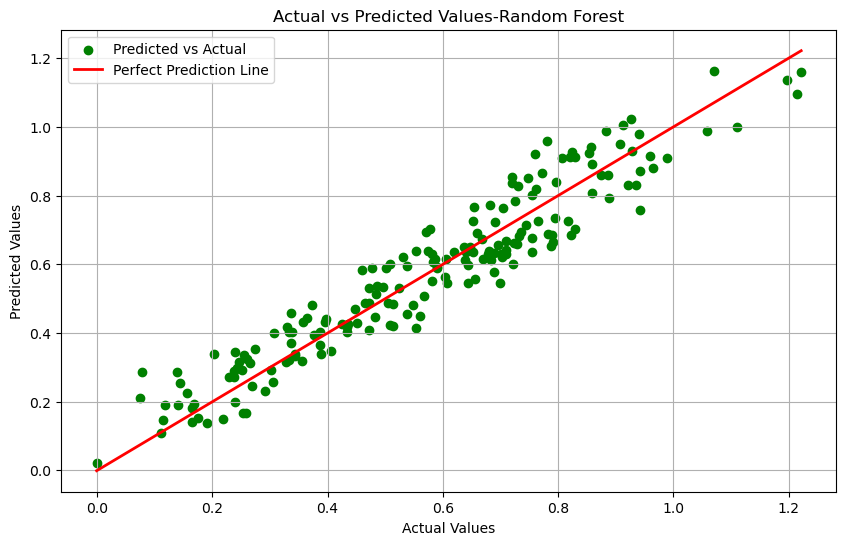

In [9]:
# Plotting
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Plot indicates that the Random Forest model is performing well, with predictions closely aligning with actual values. The majority of the data points are clustered around the perfect prediction line, suggesting good accuracy. However, there are some minor deviations, particularly at higher actual values, indicating potential areas for improvement. Overall, the model demonstrates a good balance between bias and variance, but there may be opportunities for further tuning to enhance prediction accuracy.

### 7.2.XGBoost

In [10]:
# Initialize and fit the Gradient Boosting model
gb= XGBRegressor(random_state=42)

gb.fit(X_train,y_train)

# Predict on the test set
y_pred_gb= gb.predict(X_test)

# Evaluate the model
mse_gb= mean_squared_error(y_test,y_pred_gb)
r2_gb=r2_score(y_test,y_pred_gb)

print(f'Grsdient Boosting MSE: {mse_gb:.4f}')
print(f'Grsdient Boosting R2 Score: {r2_gb:.4f}')

Grsdient Boosting MSE: 0.0042
Grsdient Boosting R2 Score: 0.9350


In [11]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(gb,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(gb,X_train,y_train,cv=5,scoring='r2')

print(cv_scores_test)

cv_scores_gb_test = cv_scores_test.mean()
cv_scores_gb_train = cv_scores_train.mean()
cv_scores_std_gb_test = cv_scores_test.std()
cv_scores_std_gb_train = cv_scores_train.std()

print(f'Mean cross-validation test score: {cv_scores_gb_test:.4f}')
print(f'Mean cross-validation train score: {cv_scores_gb_train:.4f}')
print(f'Standard deviation in cv scores (test): {cv_scores_std_gb_test:.4f}')
print(f'Standard deviation in cv scores (train): {cv_scores_std_gb_train:.4f}')

[0.79050298 0.7487324  0.79937192 0.56176916 0.75793231]
Mean cross-validation test score: 0.7317
Mean cross-validation train score: 0.9169
Standard deviation in cv scores (test): 0.0871
Standard deviation in cv scores (train): 0.0173


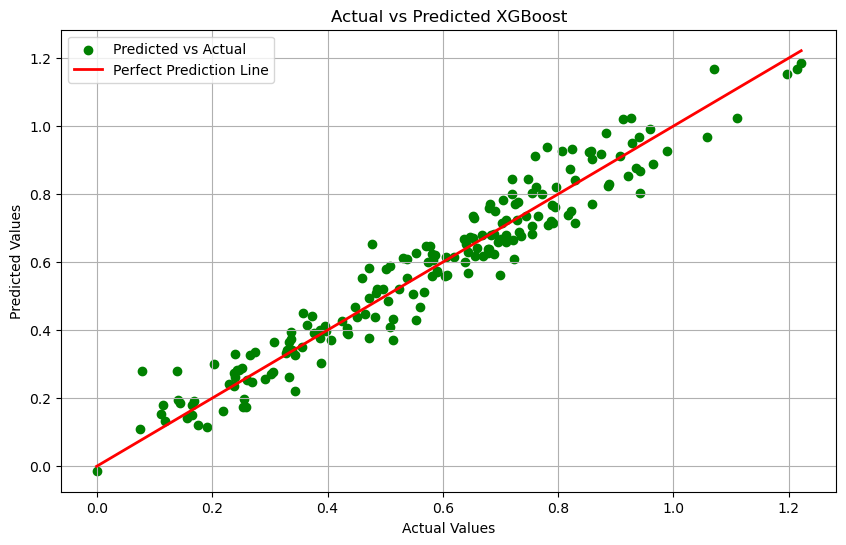

In [13]:
# Plot observed vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_gb,color='green',label='Predicted vs Actual')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=2,label='Perfect Prediction Line')


# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted XGBoost')
plt.legend()
plt.grid(True)
plt.show()


### 7.3.Comparison and Model Selection

I applied different ML models above and evaluated their performances using cross-validation for both the training and test data. Here I have tabulated the scores and plotted them.

In [12]:
# Model performance metrics

metrics={'Model':['Random Forest','XGBoost'],
        'MSE':[mse_rf,mse_gb],
        'R2':[r2_rf,r2_gb]}

# Create a DataFrame
df_metrics= pd.DataFrame(metrics)
df_metrics

Model       MSE        R2
0  Random Forest  0.005876  0.909420
1        XGBoost  0.004220  0.934952

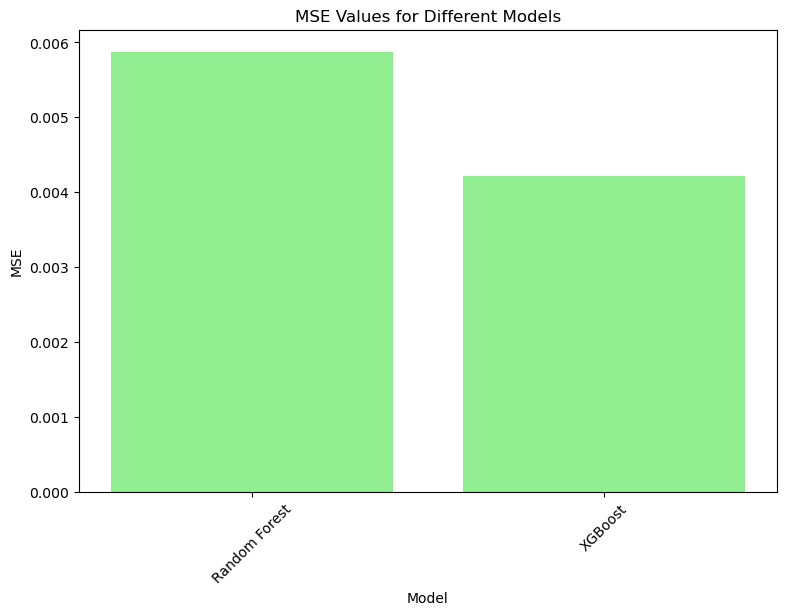

In [39]:
#plotting the accuracy scores

plt.figure(figsize=(9,6))
plt.bar(df_metrics['Model'],df_metrics['MSE'],color='lightgreen')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values for Different Models')
plt.xticks(rotation=45)

# Save the figure
plt.savefig('plot1.png')
plt.show()

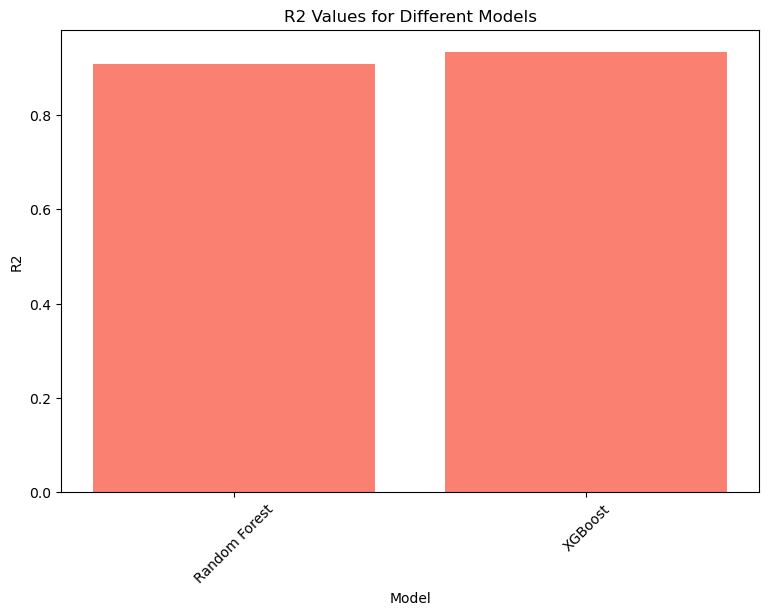

In [13]:
plt.figure(figsize=(9,6))
plt.bar(df_metrics['Model'],df_metrics['R2'],color='salmon')
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Values for Different Models')
plt.xticks(rotation=45)

plt.savefig('plot2.png')
plt.show()

Based on the above metrics results, **XGBoost Regression** is the best model among the ones compared. It has the highest R² and lowest MSE.

### 7.4.Applying Grid search CV for hyperparameter Tuning

### 7.4.1.Parameter Tuning for XGBoost Regression

In [14]:
# Define the model

xgb= XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate shrinks feature weights to make the boosting process more robust
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction to make a further partition on a leaf node
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization term on weights
    'reg_lambda': [0.1, 1.0, 10.0]  # L2 regularization term on weights
}

# Instantiate Grid Search CV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Output detailed results
    n_jobs=-1  # Use all available cores
)


In [15]:
# Fit the model using grid search
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_dept

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rat

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_de

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5,

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, ma

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_dept

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5,

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_dept

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estima

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_dep

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_dept

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estim

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learn

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, le

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learni

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_r

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.0

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, lear

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, lear

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, ma

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learnin

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_ra

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, m

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3,

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, ma

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_ra

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learnin

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, ma

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, lear

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learni

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learn

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_dep

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learn

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_dep

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rat

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_d


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_r

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rat

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, m

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, m

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_dep

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_de

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, ma

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_dept

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimat

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, m

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_de

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimato

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1,

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, lear

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learni

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, lear

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learnin

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, lear

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rat

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_de

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rat

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rat

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_r

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, 

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_r

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, le

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, lear

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_r

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learni

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learnin

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, 

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, lear

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learn

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_ra

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1,

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, m

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_ra

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_ra

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_dept

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_e

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01,

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_dept

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01,

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, 

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_dep

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, m

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, m

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_es

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_dep

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimato

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_dep

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, 

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_de

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, lear

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rat

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learnin

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learni

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, ma

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learni

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rat

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learni

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rat

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, ma

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.0

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, lear

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, 

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, lear

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, ma

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01,

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_r

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learni

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, lear

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learnin

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, ma

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, ma

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, ma

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=10.0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_r

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10.0, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=10.0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [0.1, 1.0, 10.0],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [16]:
# Get the best parameters and best model 
best_params_xgb = grid_search_xgb.best_params_
best_model = grid_search_xgb.best_estimator_

In [17]:
# Best score achieved during the grid search
best_score_xgb = grid_search_xgb.best_score_


In [18]:
# Predict on the test set using the best model
y_pred_xgb = best_model.predict(X_test)

# Evaluate on the test set
test_score_xgb = best_model.score(X_test, y_test)
print("Test R2 Score on Test Set:", test_score_xgb)


Test R2 Score on Test Set: 0.9340536243793939


In [19]:
# Calculate MSE and R2 for the test set
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the final evaluation metrics
print(f"Mean Squared Error on Test Set: {mse_xgb:.4f}")
print(f"R2 Score on Test Set: {r2_xgb:.4f}")

Mean Squared Error on Test Set: 0.0043
R2 Score on Test Set: 0.9341


After tuning, the R² score slightly decreased from 0.9350 to 0.9341, and the MSE slightly increased from 0.0042 to 0.0043.The results show that XGBoost model was already performing well before hyperparameter tuning, and tuning did not yield significant changes in the test set performance. I continue using the tuned model, but the improvement is marginal. Alternatively, the default parameters were close to optimal in this case.

### 7.5.Residual Analysis

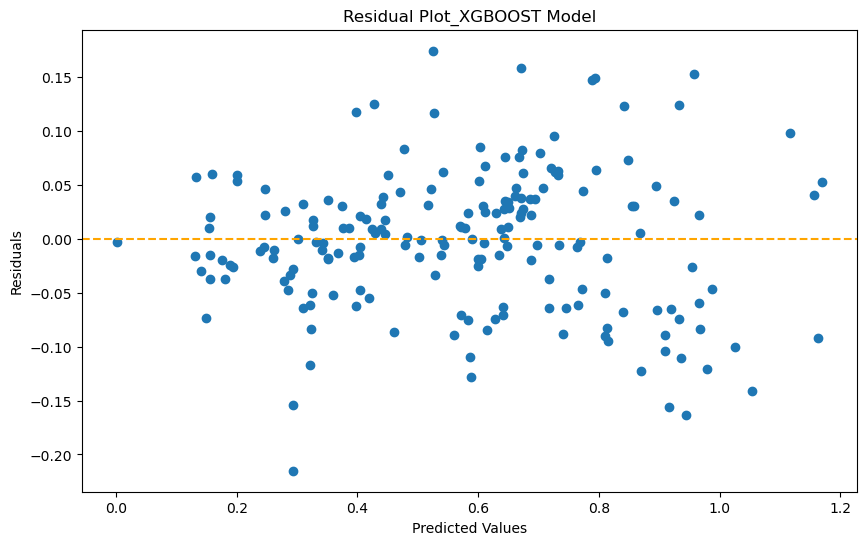

In [20]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot_XGBOOST Model')

# Save the figure
plt.savefig('plot3.png')

plt.show()


**Random Scatter Around Zero Line:**

The residuals seem to be randomly scattered around the horizontal line at 0, which is a good sign. This indicates that the model has captured the underlying pattern in the data fairly well.
There is no obvious trend or pattern (such as a curve or increasing/decreasing spread), which suggests that the model's predictions are unbiased.

**Homoscedasticity (Constant Variance):**

The spread of the residuals seems relatively constant across the range of predicted values, which suggests that the variance of the errors remains consistent. This is known as homoscedasticity, and it's a positive sign.
There are no signs of heteroscedasticity (where residuals increase or decrease systematically with the predicted values), which indicates that the model performs well across different prediction ranges.

**Outliers or Extreme Residuals:**
There are a few residuals that are quite far from the 0 line, especially on the left and right ends of the plot, which could indicate a few outliers or areas where the model struggles to make accurate predictions.


### 7.6.Time Series

For the ARIMA model, I need to combine the Year and Month columns into a single datetime index, which ARIMA can then use as a time series index.

In [19]:
# Combine Year and Month columns into a new column 'Date'

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))


#Drop the 'Year' and 'Month' columns 

df.drop(['Year', 'Month'], axis=1, inplace=True)



In [11]:
df

Anomaly  Uncertainty     CO2      CH4    N2O  Actual_Temperature  \
0      0.291        0.055  344.32  1638.79  303.8              12.521   
1      0.145        0.054  344.82  1638.84  303.8              12.585   
2      0.292        0.042  344.96  1640.88  303.7              13.352   
3      0.178        0.070  345.19  1643.99  303.7              14.148   
4      0.388        0.043  345.33  1643.12  303.7              15.338   
..       ...          ...     ...      ...    ...                 ...   
931    0.830        0.034  414.41  1908.82  335.8              16.610   
932    0.756        0.034  414.63  1915.52  335.9              15.946   
933    0.871        0.034  416.14  1919.85  336.1              15.121   
934    0.654        0.048  417.77  1923.43  336.3              13.884   
935    0.775        0.050  418.80  1924.69  336.5              13.265   

          Date  
0   1984-01-01  
1   1984-02-01  
2   1984-03-01  
3   1984-04-01  
4   1984-05-01  
..         ...  
931 2022-08-01  
932 2022-09-01  
933 2022-10-01  
934 2022-11-01  
935 2022-12-01  

[936 rows x 7 columns]

### 7.6.1. Visualizing

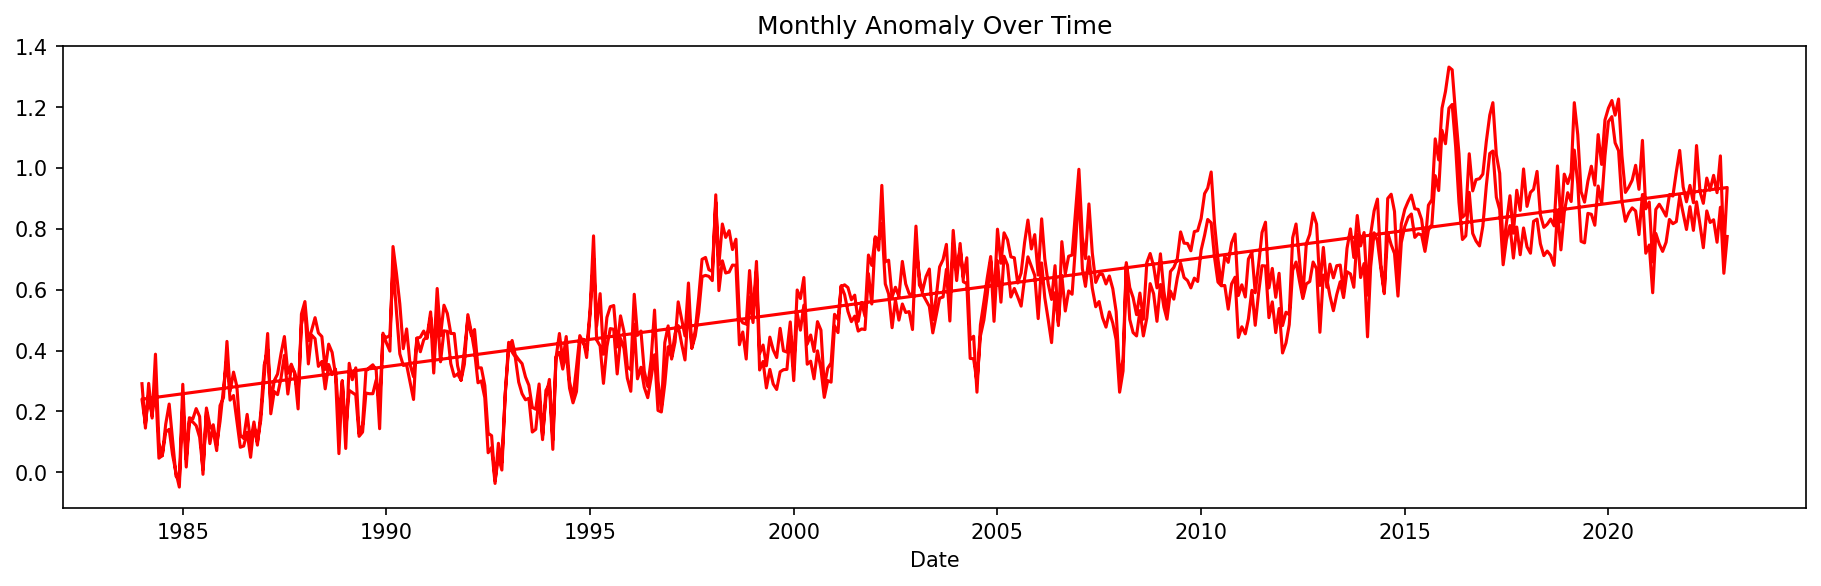

In [12]:
def plot_df(df,x,y,title='',xlabel='Date',ylabel='', dpi=150):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()

plot_df(df,x=df['Date'],y=df['Anomaly'],title='Monthly Anomaly Over Time')

The plot indicates the presence of cyclic behavior, characterized by recurring increases and decreases in the anomaly values over time.

In [13]:
x= df['Date'].values
y1= df['Anomaly'].values

def filled_plot(x, y1, y2, title='', alpha=0.5, dpi=120):
    fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=dpi)
    plt.fill_between(x, y1=y1, y2=y2, alpha=alpha, linewidth=2, color='seagreen')
    plt.ylim(min(y1.min(), y2.min()) - 0.1, max(y1.max(), y2.max()) + 0.1)
    plt.title(title, fontsize=16)
    plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=0.5)
    plt.show()

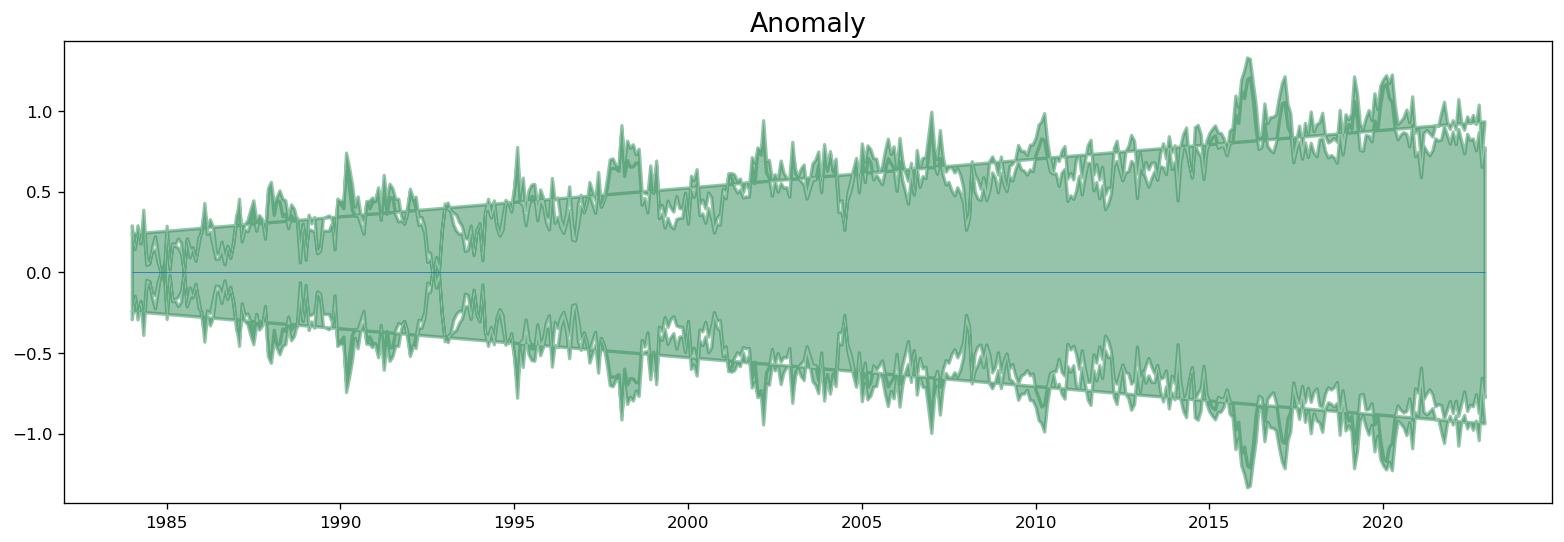

In [14]:
filled_plot(x,y1=y1,y2= -y1,title='Anomaly')

In [15]:
df.columns

Index(['Anomaly', 'Uncertainty', 'CO2', 'CH4', 'N2O', 'Actual_Temperature',
       'Date'],
      dtype='object')

The range of anomalies appears to increase over time, the temperature has become more variable in recent years. Also there is a potential trend, an upward shift in anomalies temperature, particularly towards the later years, indicating a change in the temperature data.

### 7.6.2. Time series Decomposition

 Since my data contains negative values, I should use the additive model for decomposition.Because the multiplicative decomposition model assumes that the data is strictly positive.

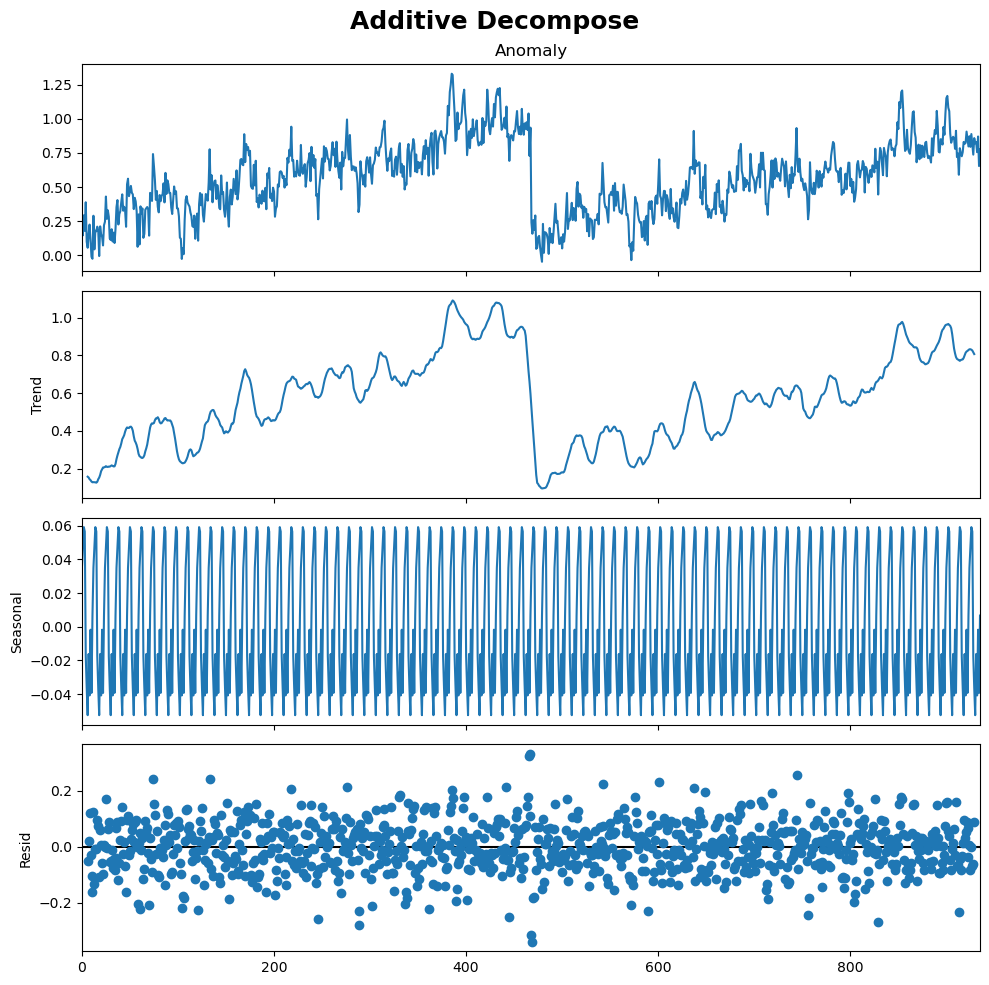

<Figure size 1000x1000 with 0 Axes>

In [27]:
# Additive Decomposition
result_add = seasonal_decompose(df['Anomaly'], model='additive',period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()
plt.subplots_adjust(top=0.9)

**Trend:**
There is an overall upward trend in the data, anomaly is increasing over time, although there was a notable dip  around the middle of the series. After this drop, the trend resumes an upward direction.


**Seasonality:**
The data has a strong seasonal component, indicating regular patterns that repeat over time.

**Residuals:** The residuals appear to be randomly scattered, the model captures the main trends and seasonality well.

### 7.6.3.Stationarity Check

The third plot in decompostion shows repeating seasonal patterns, indicating that there is seasonality in the data.I apply differencing to remove the trend.First I try the first differencing to make the series stationary with respect to the trend.After differencing, I'll check for stationarity using the Augmented Dickey-Fuller (ADF) test. 

In [20]:
# Seasonal differencing to remove seasonality 
df['Anomaly_diff'] = df['Anomaly'].diff(12)

# Drop NaN values (these are the first 12 rows that are NaN after differencing)
df = df.dropna(subset=['Anomaly_diff'])


In [21]:
df.isnull().sum()

Anomaly               0
Uncertainty           0
CO2                   0
CH4                   0
N2O                   0
Actual_Temperature    0
Date                  0
Anomaly_diff          0
dtype: int64

In [22]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        
# Check stationarity of anomaly data
adf_test(df['Anomaly_diff'])

ADF Statistic: -7.364380977986095
p-value: 9.319164650352552e-11
Critical Values:
	1%: -3.4376043869287467
	5%: -2.8647424697167403
	10%: -2.5684752071912444


The p_value 9.319164650352552e-11, which is significantly lower than the common threshold of 0.05.This means that we can reject the null hypothesis of the test. In the context of the ADF test, the null hypothesis is that the series has a unit root, indicating that the series is **non-stationary**.

The ADF statistic is -7.364, which is more negative than all the critical values at the 1%, 5%, and 10% significance levels. This further supports the conclusion that the series is **stationary**.



### 7.6.4.Selecting SRIMA Model Parameters (p, d, q)

### 7.6.4.1.Plot ACF and PACF

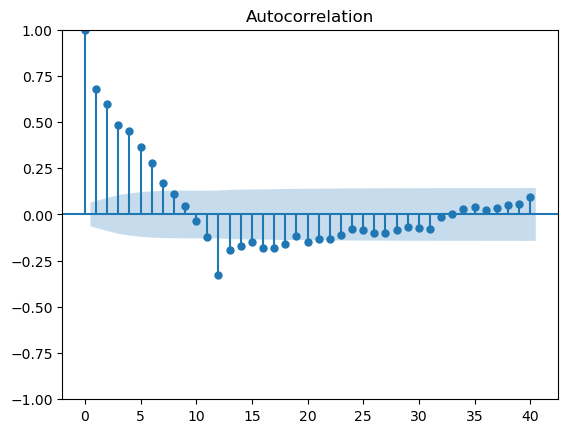

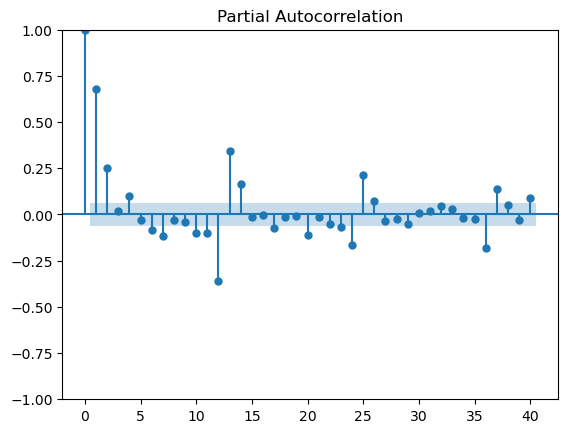

In [23]:
# Plot ACF and PACF for the differenced data

plot_acf(df['Anomaly_diff'].dropna(), lags=40)
plt.show()

plot_pacf(df['Anomaly_diff'].dropna(), lags=40)
plt.show()

**AR component (p):**

The PACF shows a significant spike at lag 1, suggesting an AR(1) model (p=1).

**MA component (q):**

The ACF shows a significant decay in the first few lags, suggesting an MA(1) or MA(2) model (q=1 or q=2).

**Differencing (d):**

Since I already performed differencing and the data is stationary, d=1 .

### 7.6.5. Fitting theSRIMA Model

After determining the parameters from the ACF and PACF plots ( p=1, d=1, q=1).


In [24]:
# Fit the SARIMA model based on the ACF/PACF insights
model = SARIMAX(df['Anomaly_diff'], 
                order=(1, 1, 1),  # (p, d, q)
                seasonal_order=(1, 1, 1, 12),  # Seasonal component (P, D, Q, S) based on seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72434D-01    |proj g|=  2.68798D+00


 This problem is unconstrained.



At iterate    5    f= -6.11871D-01    |proj g|=  2.37718D-01

At iterate   10    f= -6.13425D-01    |proj g|=  4.62786D-02

At iterate   15    f= -6.13511D-01    |proj g|=  4.69323D-02

At iterate   20    f= -6.13682D-01    |proj g|=  5.42797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   2.893D-05  -6.137D-01
  F = -0.61368218551317721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                       Anomaly_diff   No. Observations:               

The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are both negative, which is a good sign as lower values indicate a better-fitting model. HQIC is another criterion, and like AIC and BIC, lower values are preferred.

The **MA.L1** and **AR.S.L12** terms seem significant as their p-values are very low (p < 0.05), indicating these terms are important in explaining the data.

* **Ljung-Box** test indicates no autocorrelation in residuals (since p > 0.05), which is good.
* **Jarque-Bera** test for normality of residuals suggests the residuals might not be normally distributed (p-value is very small).

The model seems to fit well based on the AIC, BIC, and the significance of the coefficients.

### 7.6.6.Examining the Residuals 

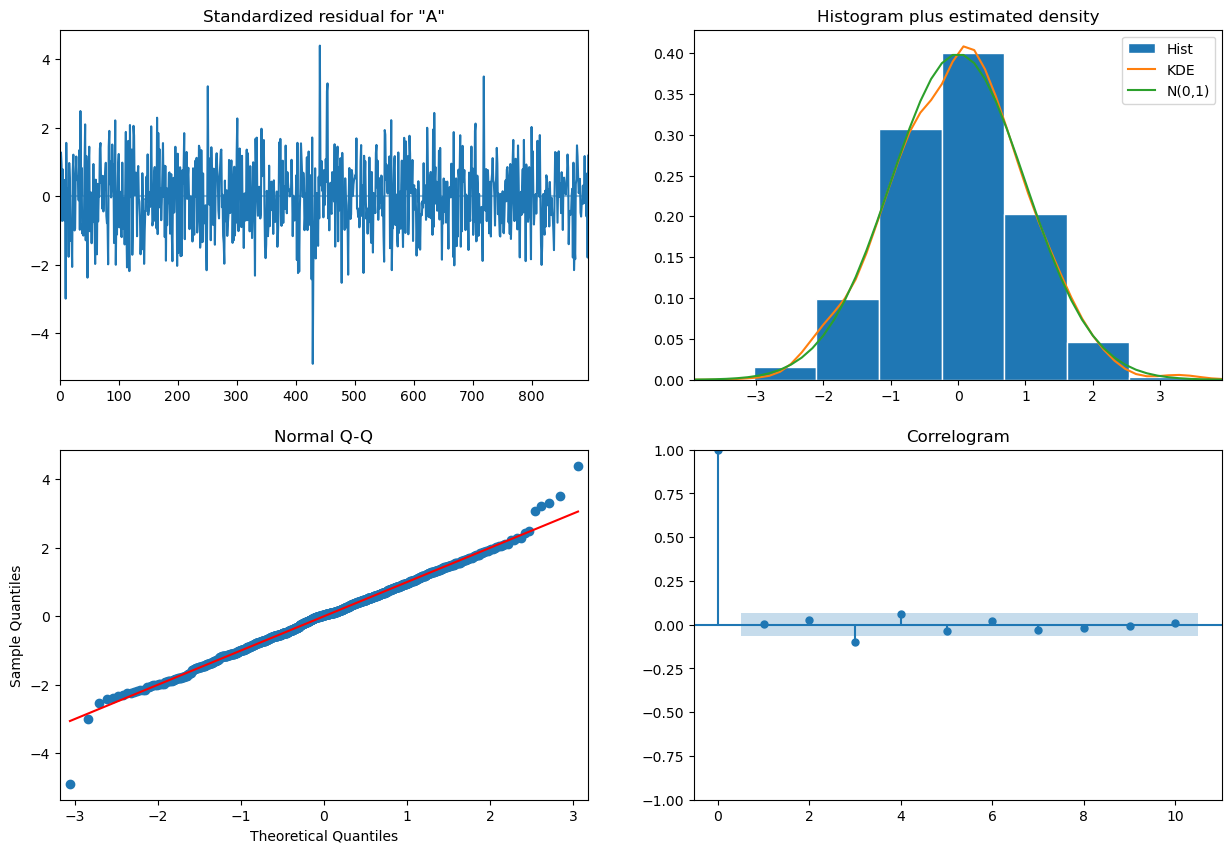

In [25]:
# Calculate residuals for first model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

**Standardized Residuals (Top Left):**

* The residuals seem to hover around zero with no apparent patterns. This is a good sign, as it suggests that the model has captured the underlying structure of the data well, and the residuals are behaving like white noise.

* There are no major spikes or trends visible, which indicates no significant autocorrelation left in the data.

**Histogram plus Estimated Density (Top Right):**

* The residuals follow a distribution that is approximately normal but with some deviations (especially a bit more weight in the tails).

* The KDE (Kernel Density Estimate) curve is slightly deviating from the normal distribution, but this might be acceptable depending on the strictness of your assumptions.

* However, the residuals are reasonably centered around zero, which is generally good.

**Normal Q-Q Plot (Bottom Left):**

* The Q-Q plot shows how well the residuals follow a normal distribution. Most points lie close to the red line, which is a positive sign.

* There are slight deviations at the tails (especially the lower tail), indicating some minor non-normality in the residuals, but this is not severe.

**Correlogram (Bottom Right):**

* The correlogram (ACF plot of residuals) shows that most autocorrelations are within the blue confidence bands, meaning there’s no significant autocorrelation left in the residuals.

* This is an important check for SARIMA models because if the residuals still show autocorrelation, it would indicate the model is not adequately capturing all the time dependencies in the data.

### 7.6.7.Forecasting/Predicting Future Values

In [26]:
# Forecasting the next 30 years (assuming monthly data, this would be 30*12 = 360 steps)

forecast = model_fit.get_forecast(steps=360)

# Get the predicted mean and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
print(len(forecast_values))

360


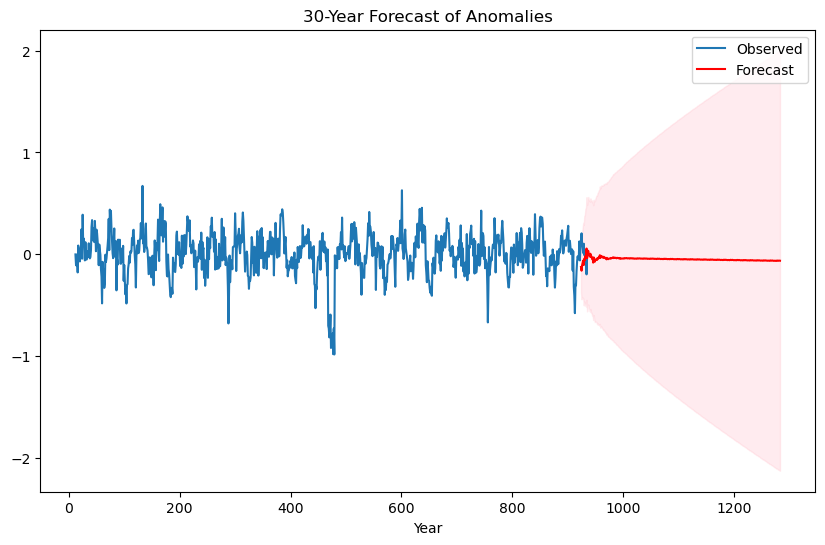

In [27]:
#Plot the forecast with yearly x-axis labels
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Anomaly_diff'], label='Observed')  # Observed data
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')  # Forecasted values
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)  # Confidence intervals
plt.title('30-Year Forecast of Anomalies')
plt.xlabel('Year')  # Label x-axis as Year
plt.legend()
plt.show()